#### Data Collection

To obtain data related to the University of Maryland, College Park, a data extraction process was performed using the tweepy package, which is a Python library for accessing the Twitter API. The extraction was performed by searching for various hashtags related to the University of Maryland, College Park on Twitter. These hashtags were used as search terms to filter the tweets related to the University of Maryland, College Park. The extracted data was then stored in a data structure for further analysis and processing. This process allowed us to collect relevant data related to the University of Maryland, College Park from Twitter.

This Python code utilizes the Twitter API and the Tweepy library to collect tweets related to a set of predefined hashtags. The hashtags are stored in a list and the code loops through each hashtag to search for related tweets. The search is limited to English language tweets and only 100 tweets are returned per page with a maximum of 200 pages per hashtag. 

The code also filters out retweets and duplicates by keeping track of unique tweets using a set data structure. Regular expressions are used to remove hashtags and URLs from the tweets to clean up the text data. 

The collected tweets are stored in a Pandas DataFrame and exported to a CSV file. The DataFrame includes the tweet content, the hashtag it was collected from, and the timestamp of the tweet. The code stops collecting tweets after 3000 unique tweets have been collected across all hashtags. 

Overall, this code provides a useful tool for collecting and analyzing tweets related to specific topics or keywords on Twitter. It could be adapted for various research projects and social media monitoring purposes.

In [1]:
import tweepy
import pandas as pd
import re

# Set up API keys
consumer_key = MASKED
consumer_secret = MASKED
access_token = MASKED
access_token_secret = MASKED

# Authenticate with Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

hashtags = ["umd","umcp", "FearlesslyUMD", "CollegePark","smithterps", "MarylandDay", "IAmARHU", "UMDgrad", "AGNRTerps", "GivingDayUMD", "DoGoodUMD"]
unique_tweets = set()
tweet_list = []
counter = 0
for hashtag in hashtags:
        query = hashtag
        # Loop through search results using pagination
        for page in tweepy.Cursor(api.search_tweets, q=hashtag, lang='en', tweet_mode='extended',count =100).pages(200):
        # Loop through tweets on the page
            for tweet in page:
            # Check if the tweet is a retweet or a duplicate
                if 'retweeted_status' in dir(tweet):
                    tweet_text = tweet.retweeted_status.full_text
                else:
                    tweet_text = tweet.full_text
                    
                tweet_text = re.sub(r"(#[\d\w]+)|(http\S+)", "", tweet_text).strip()
                
                if tweet_text not in unique_tweets:
                    unique_tweets.add(tweet_text)
                
                    tweet_list.append({
                        'content': tweet_text, 
                        'hashtag': hashtag, 
                        'timestamp': tweet.created_at})
                    counter += 1
                if counter == 6000:
                    break
                
        if counter == 6000:
            break

df = pd.DataFrame(tweet_list)
df.to_csv('tweets.csv', index=False)

#### Data Preprocessing

This Python code is designed to preprocess the text of tweets collected from the Twitter API using the Tweepy library. The code makes use of the Natural Language Toolkit (NLTK), a popular library for working with natural language data in Python.

The code begins by downloading the NLTK resources for stop words and tokenization. Stop words are common words like "the", "and", and "is" that are often removed from text data because they do not add significant meaning. Tokenization is the process of splitting text into individual words or tokens.

The code then loads the stop words and punctuation from the NLTK resources into Python sets. These sets will be used later to remove stop words and punctuation from the tweet text.

Next, the code defines a function called "preprocess_tweet" that takes a single tweet as input and returns a cleaned version of the text. The function performs several steps to clean the tweet text:

1. Remove URLs and mentions: The regular expression in the code removes any URLs or Twitter handles (mentions) from the tweet text using the re.sub() function.

2. Tokenize the tweet text: The word_tokenize() function from NLTK is used to split the text into individual words or tokens.

3. Remove stop words and punctuation: The code uses a list comprehension to remove any tokens that are stop words or punctuation marks.

4. Join the tokens back into a single string: The cleaned tokens are joined back together into a single string using the str.join() method.

The cleaned tweet text is then returned by the function.

Overall, this code provides a useful tool for preprocessing text data from Twitter for use in natural language processing (NLP) tasks like sentiment analysis or topic modeling. It could be adapted for various research projects and social media monitoring purposes.

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

# Download the NLTK resources for stop words and tokenization
nltk.download('stopwords')
nltk.download('punkt')

# Load the stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Define a function to preprocess the tweet text
def preprocess_tweet(tweet):
    # Remove URLs and mentions
    tweet = re.sub(r"(#[\d\w]+)|(http\S+)|(@\w+)", "", tweet)
    # Tokenize the tweet text
    tokens = word_tokenize(tweet)
    # Remove stop words and punctuation from the tokens
    tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    # Join the tokens back into a single string
    cleaned_tweet = " ".join(tokens)
    return cleaned_tweet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# Preprocess the tweet content in the DataFrame
df = pd.read_csv('tweets.csv')
df['content'] = df['content'].apply(preprocess_tweet)
df.dropna(subset=['content'], inplace=True)
df.to_csv('cleaned_tweets.csv', index=False)

#### Feature Extraction

This code uses scikit-learn's CountVectorizer and TfidfVectorizer to convert the preprocessed tweet text into a matrix of word counts and TF-IDF values, respectively. 

The CountVectorizer counts the occurrences of each word in the tweet text and creates a matrix where each row corresponds to a tweet and each column corresponds to a word in the vocabulary. The value in each cell of the matrix represents the number of times the corresponding word appears in the corresponding tweet. 

The TfidfVectorizer weighs the importance of each word in the tweet text by calculating the term frequency-inverse document frequency (TF-IDF) score. The TF-IDF score for a word in a tweet is calculated as the product of its term frequency (the number of times it appears in the tweet) and its inverse document frequency (the logarithm of the total number of tweets divided by the number of tweets that contain the word). The resulting matrix has the same format as the count matrix, with rows corresponding to tweets and columns corresponding to words.

Finally, the code converts the count and TF-IDF matrices into Pandas DataFrames for further analysis.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

df=pd.read_csv('cleaned_tweets.csv')
df = df.dropna(subset=['content'])
# Create a CountVectorizer to count the occurrences of each word in the tweet text
count_vectorizer = CountVectorizer()

# Create a TfidfVectorizer to weigh the importance of each word in the tweet text using TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizers to the preprocessed tweet text
count_matrix = count_vectorizer.fit_transform(df['content'])
tfidf_matrix = tfidf_vectorizer.fit_transform(df['content'])

# Convert the matrix to a DataFrame
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names())

print("Bag-of-words DataFrame:\n", count_df.head())
print("\nTF-IDF DataFrame:\n", tfidf_df.head())

count_df.to_csv('count_df_tweets.csv', index=False)
tfidf_df.to_csv('tfidf_df_tweets.csv', index=False)

C:\Users\jayan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\jayan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Bag-of-words DataFrame:
    00  000  00_ethers  00am  00pm  01  02  03  0301  04  ...  𝘁𝗵𝗶𝘀  𝘆𝗲𝗮𝗿  \
0   0    0          0     0     0   0   0   0     0   0  ...     0     0   
1   0    0          0     0     0   0   0   0     0   0  ...     0     0   
2   0    0          0     0     0   0   0   0     0   0  ...     0     0   
3   0    0          0     0     0   0   0   0     0   0  ...     0     0   
4   0    0          0     0     0   0   0   0     0   0  ...     0     0   

   𝙂𝙚𝙩𝙩𝙞𝙣𝙜  𝙈𝙞𝙙𝙬𝙚𝙚𝙠  𝙍𝙚𝙖𝙙𝙮  𝙘𝙡𝙖𝙨𝙨𝙧𝙤𝙤𝙢  𝙙𝙤𝙣𝙚  𝙞𝙣  𝙟𝙤𝙗  𝙩𝙝𝙚  
0        0        0      0          0     0   0    0    0  
1        0        0      0          0     0   0    0    0  
2        0        0      0          0     0   0    0    0  
3        0        0      0          0     0   0    0    0  
4        0        0      0          0     0   0    0    0  

[5 rows x 9427 columns]

TF-IDF DataFrame:
     00  000  00_ethers  00am  00pm   01   02   03  0301   04  ...  𝘁𝗵𝗶𝘀  𝘆𝗲𝗮𝗿  \
0  0.0  0.0        0.0   0.0   0

#### Labelling Data

This code uses the Hugging Face Transformers library to perform sentiment analysis on a list of tweets. The sentiment analysis is done using a pre-trained model, which is accessed through the `pipeline()` function. 

The `pipeline()` function is called with the argument `'sentiment-analysis'` to specify that we want to perform sentiment analysis. 

The tweets are first extracted from the `df` DataFrame and stored in a list. 

The `classifier()` function is then called on the list of tweets, which returns a list of dictionaries containing the sentiment label and score for each tweet. 

The sentiment labels are extracted from the list of dictionaries and stored in a new DataFrame `df_sentiments` along with the original tweet text. 

Finally, the `head()` function is used to display the first few rows of the `df_sentiments` DataFrame.

In [8]:
from transformers import pipeline
import pandas as pd

classifier = pipeline('sentiment-analysis')

tweets = df['content'].tolist()

results = classifier(tweets)

sentiments = []
for result in results:
    sentiment = result['label']
    sentiments.append(sentiment)

df_sentiments = pd.DataFrame({'content': tweets, 'sentiment': sentiments})
print(df_sentiments.head())
df_sentiments.to_csv('tweets_sentiment.csv', index=False)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


                                             content sentiment
0                  Had great time today Thank invite  POSITIVE
1   Had amazing junior day Thank coaches hospitality  POSITIVE
2  As Lucy Dalglish approaches conclusion 11-year...  POSITIVE
3  Kettle Moraine 2024 DB speedster Noah Hait exc...  POSITIVE
4                               UMD HERE WE COME 🥳🥳🎉  NEGATIVE


In [9]:
import csv

with open('tweets_sentiment.csv', 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    with open('preprocessed_tweets.txt', 'w', encoding='utf-8') as txtfile:
        for row in reader:
            txtfile.write('\t'.join(row) + '\n')


##### Model Training & Evaluation 

This code trains a deep learning model to classify tweets as positive or negative based on their content. The code first reads in preprocessed tweet data and converts the labels to binary values. Then, it tokenizes the text using white space tokenization and pads the sequences of the text. The data is split into training and testing sets. 

The model architecture consists of an embedding layer, a convolutional layer, a max pooling layer, a long short-term memory (LSTM) layer, a reshape layer, a gated recurrent unit (GRU) layer, and a dense layer with a sigmoid activation function. The model is compiled using binary cross-entropy as the loss function and Adam as the optimizer. The model is trained on the training data with 25 epochs and a batch size of 128. 

The code evaluates the model on the test data and calculates the accuracy, precision, recall, and F1-score. It also outputs a classification report and a confusion matrix. The confusion matrix is displayed using seaborn heatmap.

Epoch 1/30
22/22 [==============================] - 21s 615ms/step - loss: 0.6934 - accuracy: 0.5208 - val_loss: 0.6951 - val_accuracy: 0.4847
Epoch 2/30
22/22 [==============================] - 15s 694ms/step - loss: 0.6938 - accuracy: 0.4872 - val_loss: 0.6937 - val_accuracy: 0.4847
Epoch 3/30
22/22 [==============================] - 14s 622ms/step - loss: 0.6935 - accuracy: 0.5036 - val_loss: 0.6932 - val_accuracy: 0.4861
Epoch 4/30
22/22 [==============================] - 16s 715ms/step - loss: 0.6929 - accuracy: 0.5036 - val_loss: 0.6849 - val_accuracy: 0.6555
Epoch 5/30
22/22 [==============================] - 16s 702ms/step - loss: 0.5455 - accuracy: 0.7376 - val_loss: 0.5337 - val_accuracy: 0.7387
Epoch 6/30
22/22 [==============================] - 16s 749ms/step - loss: 0.2279 - accuracy: 0.9281 - val_loss: 0.7089 - val_accuracy: 0.7650
Epoch 7/30
22/22 [==============================] - 16s 728ms/step - loss: 0.0880 - accuracy: 0.9715 - val_loss: 0.8482 - val_accuracy: 0.7810

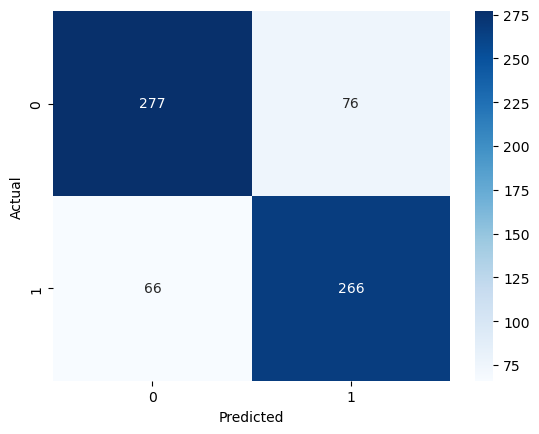

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import Reshape
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

with open('preprocessed_tweets.txt', 'r', encoding='ISO-8859-1') as f:
    preprocessed_tweet_text = []
    labels = []
    for line in f:
        text, label = line.strip().split('\t')
        preprocessed_tweet_text.append(text)
        labels.append(label.lower())

# Convert the labels to binary values
labels = np.array([1 if label == 'positive' else 0 for label in labels])

# Tokenize the text using white space tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_tweet_text)
sequences = tokenizer.texts_to_sequences(preprocessed_tweet_text)

# Pad the sequences of the text
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(Reshape((-1, 128)))
model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train,  y_train, validation_data=(X_test, y_test), epochs=30, batch_size=128)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



#### Step 6: Predicting the sentiment of the 10 Random Sentences.

In [77]:
test_sentences = [
    'I am so happy to be spending time with my family today.',
    'The loss of my dog has left me feeling devastated.',
    'This new job opportunity has me feeling excited and nervous at the same time.',
    'Seeing my best friend after a long time made me feel overjoyed.',
    'I feel so grateful for the support and encouragement I\'ve received from my loved ones.',
    'The news of my grandmother\'s passing has left me feeling heartbroken.',
    'I\'m feeling a mix of anticipation and anxiety as I prepare for my upcoming presentation.',
    'Spending time alone in nature always leaves me feeling peaceful and refreshed.',
    'The unexpected act of kindness from a stranger made my day.',
    'The constant stress and pressure from work has left me feeling overwhelmed and exhausted.'
]

In [43]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define a function to preprocess a given sentence
def preprocess_sentence(sentence):
    words = sentence.lower().split()  # convert to lowercase and split into words
    words = [word for word in words if word not in stop_words]  # remove stopwords
    return " ".join(words)  # join the words back into a sentence

# Define a function to predict sentiment for a given sentence
def predict_sentiment(sentence):
    cleaned_sentence = preprocess_sentence(sentence)
    sequence = tokenizer.texts_to_sequences([cleaned_sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    prediction = model.predict(padded_sequence)[0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    return sentiment

# Predict sentiments for all test sentences and print the results
for sentence in test_sentences:
    sentiment = predict_sentiment(sentence)
    print(f"Sentence: {sentence}\nPredicted Sentiment: {sentiment}\n")

1/1 [==============================] - 0s 42ms/step
Sentence: I am so happy to be spending time with my family today.
Predicted Sentiment: Positive

1/1 [==============================] - 0s 33ms/step


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sentence: The loss of my dog has left me feeling devastated.
Predicted Sentiment: Negative

1/1 [==============================] - 0s 37ms/step
Sentence: This new job opportunity has me feeling excited and nervous at the same time.
Predicted Sentiment: Positive

1/1 [==============================] - 0s 40ms/step
Sentence: Seeing my best friend after a long time made me feel overjoyed.
Predicted Sentiment: Positive

1/1 [==============================] - 0s 44ms/step
Sentence: I feel so grateful for the support and encouragement I've received from my loved ones.
Predicted Sentiment: Positive

1/1 [==============================] - 0s 38ms/step
Sentence: The news of my grandmother's passing has left me feeling heartbroken.
Predicted Sentiment: Negative

1/1 [==============================] - 0s 38ms/step
Sentence: I'm feeling a mix of anticipation and anxiety as I prepare for my upcoming presentation.
Predicted Sentiment: Negative

1/1 [==============================] - 0s 46ms/step
Sen

In [79]:
# Define a function to preprocess the text and generate padded sequences
def preprocess_sentence(sentence):
    words = sentence.lower().split()  # convert to lowercase and split into words
    words = [word for word in words if word not in stop_words]  # remove stopwords
    return " ".join(words)  # join the words back into a sentence

# Define a function to predict the sentiment of a sentence
def predict_sentiment(sentence):
    cleaned_sentence = preprocess_sentence(sentence)
    sequence = tokenizer.texts_to_sequences([cleaned_sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    prediction = model.predict(padded_sequence)[0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    return sentiment

# Test the function with 10 sample sentences
sample_texts = [
    'The weather outside is beautiful and perfect for a picnic.',
    'I had a terrible day at work today.',
    'I just finished reading a great book and it was amazing.',
    'The traffic today was horrible and it made me late for my appointment.',
    'I love spending time with my family and friends.',
    'The food at this restaurant is always delicious.',
    'I can\'t believe I forgot my phone at home today.',
    'I feel so lucky to have such wonderful people in my life.',
    'The movie I watched last night was boring and predictable.',
    'I\'m so excited to start my new job next week!'
]

for sentence in sample_texts:
    sentiment = predict_sentiment(sentence)
    print(f"Sentence: {sentence}\nPredicted Sentiment: {sentiment}\n")


1/1 [==============================] - 0s 33ms/step
Sentence: The weather outside is beautiful and perfect for a picnic.
Predicted Sentiment: Negative

1/1 [==============================] - 0s 41ms/step
Sentence: I had a terrible day at work today.
Predicted Sentiment: Positive

1/1 [==============================] - 0s 45ms/step
Sentence: I just finished reading a great book and it was amazing.
Predicted Sentiment: Positive

1/1 [==============================] - 0s 30ms/step
Sentence: The traffic today was horrible and it made me late for my appointment.
Predicted Sentiment: Positive

1/1 [==============================] - 0s 48ms/step
Sentence: I love spending time with my family and friends.
Predicted Sentiment: Positive

1/1 [==============================] - 0s 57ms/step
Sentence: The food at this restaurant is always delicious.
Predicted Sentiment: Positive

1/1 [==============================] - 0s 49ms/step
Sentence: I can't believe I forgot my phone at home today.
Predicted 

#### Testing